# Visuals and Arts 2

Up to now we have mainly used this session to introduce how to produce visuals of data. This is important but Manovich also had the analysis of images and other multimedia in mind when he first defined Cultural Analytics. Next, we talk therefore about a few simple exercises to work with images. We will see that basic image manipulation is actually quite simple because images are matrixes and can be manipulated just like any other matrix. You might remember matrixes from the introductions? If not, it is good to look them up again. They are similar to data frame but simpler. They contain only one type for all columns. In the case of images, these are pixel values.

First we load our standard libraries again. Run the next cell and observe that we also load imshow directly. We will use it to display our images.

In [1]:
#Keep cell
import pandas as pd
import numpy as np
import sca

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
%matplotlib inline


Pillow (https://pypi.org/project/Pillow/) is the most commonly used library to process images. Load its Image part with `from PIL import Image`.

Next, convert the values of the image into a numpy array and check out the dimensions of vanGogh with numpy: np.shape(vanGogh)

In [2]:
from PIL import Image

Because we are in Amsterdam, we will work with the famous self-portrait of van Gogh. With PIL's `Gogh = Image.open('data/vanGogh_selfPortrait.jpg')`, you can load the picture from our datasets. Also take a look at Gogh afterwards.

In [3]:
Gogh = Image.open('data/vanGogh_selfPortrait.jpg')

First, we need to understand what images actually are in the eye of the computer. As said, they are essentially matrixes containing pixel values. Colour images will also include Red-Green-Blue (RGB) information. These RGB channels quantify any colour. Check out https://www.tutorialspoint.com/python_pillow/python_pillow_colors_on_an_image.htm for a detailed explanation and especially the red, green and blue colour coding. A combination of RGB defines any colour for the human eye. This means we need to store all pixels of the image according to its height and width axes and this has to happen three times, because we need one matrix for each RGB colour channel. We need one matrix each for red, green and blue. This leads to a three-dimensional matrix: https://en.wikipedia.org/wiki/Channel_(digital_image).

Let's check it by running:
```
nGogh = np.array(Gogh)
np.shape(nGogh)
```

shape returns the shape of a numpy array.

In [4]:
nGogh = np.array(Gogh)
np.shape(nGogh)

(768, 608, 3)

As expected, vanGogh is a 3-dimensional numpy array. It is a 768 by 608 image (first 2 components of the array). The last dimension of this array is the channel with 3 values (1 for red, 2 for green, 3 for blue).

Let's use `imshow(nGogh)` to display this array as the actual image that it is.

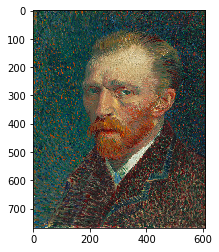

In [5]:
imshow(nGogh)

That’s van Gogh. 

If we handle the image as a numpy array we can also manipulate it as we would a numpy array, by for example cropping it. An image crop reduces the width and height. You apply crops often if images are too large to handle. We can easily crop an image in Python by using the fact that it is an array. Try: 
```
crop = nGogh[100:400,100:400,:]
np.shape(crop)
```

In [6]:
crop = nGogh[100:400,100:400,:]
np.shape(crop)

(300, 300, 3)

Remember that images are matrixes of pixels! In this case, we cut out everything apart from pixels 100 to 400-1, leading to a 300 by 300 image. We kept all 3 colour channels by using the third comma with an ':'.

Let's take a look at crop with imshow. Do you know how?

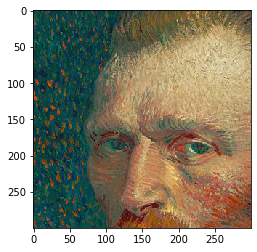

In [7]:
imshow(crop)

As an exercise, crop vanGogh to a range of 100 to 300 and 100 to 300. Display it directly in the same cell.

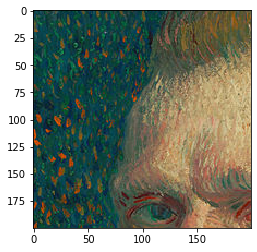

In [8]:
crop2 = nGogh[100:300,100:300,:]
imshow(crop2)

Rotation of images is also a fun things to do. 
The NumPy function that rotates ndarray is np.rot90(), so let us rotate the master with it. Check out the documentation how and then also display rotated_gogh.

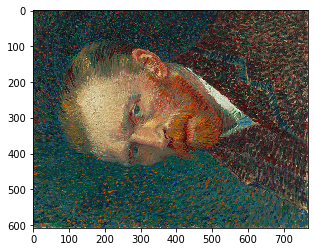

In [9]:
rotated_gogh = np.rot90(nGogh)
imshow(rotated_gogh)

Next we filter out the blue and the green colour channels so that we are left only with the red. This time we want to operate directly on the numpy array. So, first we make a copy with `red = nGogh.copy()`.

In [10]:
red = nGogh.copy()

How do we eliminate colours? Remeber they are channels or the third dimension of our arrays. So, we just have to set green and blue to 0. The red channel is dimenions 0. Run `red[:,:,1] = 0 ` to set the green channel to 0.

In [11]:
red[:,:,1] = 0 # set green to zero

Can you also set the blue channel to 0? Hint: It is channel 2.

In [12]:
red[:,:,2] = 0 # set blue to zero

Please, display red.

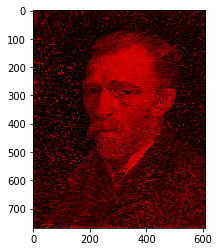

In [13]:
imshow(red)

As an exercise, please create now a green image of vanGogh. You can do this in one cell below.

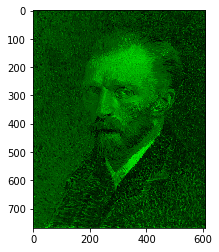

In [14]:
blue = nGogh.copy()
blue[:,:,0] = 0 # set red to zero
blue[:,:,2] = 0 # set blue to zero
imshow(blue)

Finally, we would like to produce a black and white van Gogh. A black and white image consists of a single pixel value for all RGB channels. For each of the channels, we simply need to calculate the average of all three colour channels. First, let us make a copy again with `BW = nGogh.copy()`.

In [15]:
BW = nGogh.copy()

Then, we calculate the average of all three RGB channels and assign it to the first channel, which is the red one. Numpy's mean does the job for us: https://numpy.org/doc/stable/reference/generated/numpy.mean.html. Wit axis=2, we indicate that we want to take the average of the other dimensions, which are the various pixel values. Run `BW = np.mean(BW, axis=2)` to create the average.

In [16]:
BW = np.mean(BW, axis=2)
np.shape(BW)

(768, 608)

Run `imshow(BW, cmap = plt.get_cmap('gray'))` to tell Python to display the image in gray-scale mode.

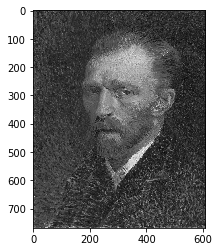

In [17]:
imshow(BW, cmap = plt.get_cmap('gray'))

That is almost it for today. I think you got the idea that images are pixel matrixes/arrays based on colour channels that you can manipulate like any other matrix of numbers. Using this knowledge, you could analyse, for instance, digital images of paintings to find out whether they are by the same artist. Take a look at a Kaggle competition (https://www.kaggle.com/c/painter-by-numbers), which promises to develop an algorithm to detect art forgeries. The algorithm is supposed to assess with certainty that paintings are by van Gogh or not. For the competition, they use images freely available from https://www.wikiart.org/. You could also download a few from the site and apply your newly learned skills

For the rest of today’s session, we go through a few more or less fun exercises to show you a few of the more advanced image analytics you can perform in order to complete Manovich’s idea of Cultural Analytics. The first question, I would like to address is what the average digital humanities person (say from various Amsterdam related organisations) looks like. Think about it and ask yourself how we could do this after everything we have just learned about the numbers of images and quantified colours.

I have prepared a function sca.average_DH_person that calculates the average image from several JPEGs (only JPEGs at the moment). It simply delivers the average of all pixel values in all the images in a folder. 

So, the first question is how to find all JPEG images in a folder with Python. It's very easy with the Glob library. Take a look at the cell below and run it.

In [18]:
#Keep cell 

import glob
images = glob.glob("data/images/*.jpg")
images[:5]

['data/images/8.jpg',
 'data/images/9.jpg',
 'data/images/12.jpg',
 'data/images/13.jpg',
 'data/images/10.jpg']

You call `sca.average_DH_person(images)` with the folder these images can be found in using glob.

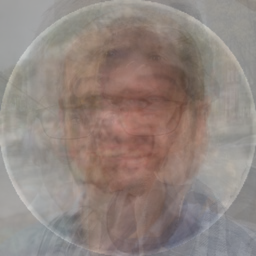

In [19]:
sca.average_DH_person(images)


Such average images always look like ghosts in my experience. But you can hopefully recognise the shape of a person.

Next, let us ask what kind of colours the average DH person prefers to wear. We have created a function sca.colour_preferences(images) that should deliver the colours in a set of images based on their file identifiers. So, you can run `colours = sca.colour_preferences(images)`. colour_preferences returns the most common colour in an image. Check out colours ...

In [20]:
colours = sca.colour_preferences(images)
colours

['#bfb6b1',
 '#f5f5f5',
 '#c3cad4',
 '#525254',
 '#000000',
 '#ffffff',
 '#edefee',
 '#000000',
 '#000000',
 '#ffffff',
 '#ffffff',
 '#c1bfb2']

These are the hex codes for the most common colour in the images: https://en.wikipedia.org/wiki/Web_colors.

Next we count them, employing them with the very useful Counter from collections. Load Counter with `from collections import Counter`.

In [21]:
from collections import Counter 

To count, we just have to run Counter on colours:
```
counts = Counter(colours)
counts
```

In [22]:
counts = Counter(colours)
counts

Counter({'#000000': 3,
         '#525254': 1,
         '#bfb6b1': 1,
         '#c1bfb2': 1,
         '#c3cad4': 1,
         '#edefee': 1,
         '#f5f5f5': 1,
         '#ffffff': 3})

Counter creates a dictionary with the colour in hex code as the key and the frequency as the value. Let's pie chart them

Let's plot a piechart of the most common colors of the images. Run the cell below. It looks complicated but actually contains a lot of things we have already discussed. Do you recognise them?

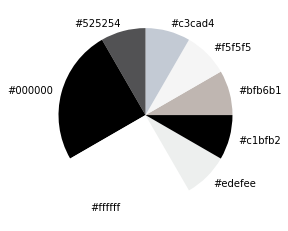

In [23]:
#Keep cell

plt.pie([float(v) for v in counts.values()], labels=[k for k in counts], colors = colours, autopct=None)
plt.show()

The average DH persons prefers a somewhat grey appearance! Apparently the most common colors in the pictures are white (#ffffff) and black (#000000).

Let's continue with our analysis a bit more and check next the frequencey of the various pixel values in the image of vanGogh. We want to display a histogram of them. sns.histplot, as you know, takes a one-dimenionsinal array as an input. So, we first have to flatten our three dimenions into one. Numpy has a function called flatten, which exactly does this. Run `flt = nGogh.flatten()`. 

BTW: You will come across the numpy reshape function a lot in code. It allows you to reshape an array into any other possible dimensions. Check out its reference at https://numpy.org/doc/stable/reference/generated/numpy.reshape.html. Instead of flatten we could also run nGogh.reshape(1,-1), which translates to: Use 1 row and fit in all the values into it (all values are -1 in reshape).

In [24]:
flt = nGogh.flatten()

Now run sns.histplot with nGogh as the data and x=flt.

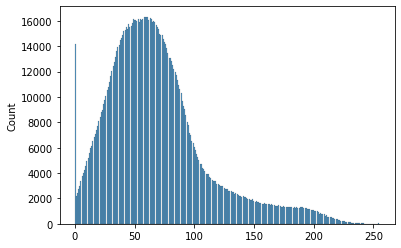

In [25]:
sns.histplot(data = nGogh, x=flt)

You are now interested in the choices of the three base colours. Run the next cell to create flattened arrays only for the three base colours

In [26]:
#Keep cell
fltr = nGogh[:,:,0].flatten()
fltg = nGogh[:,:,1].flatten()
fltb = nGogh[:,:,2].flatten()

Run `sns.histplot(data = nGogh, x=fltr, color='red')` to create a histogram for the red colours.

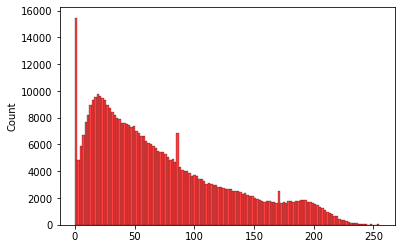

In [27]:
sns.histplot(data = nGogh, x=fltr, color='red')

As an exercise change the above cell to display red and green, too. 

Finally, can you create an overlapping histogram for all three colours with three sns.histplots in the next cell. Set alpha to 0.25 and you should see a very nice colour comparision.

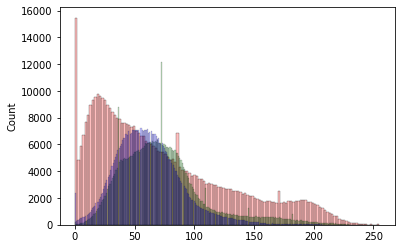

In [28]:
sns.histplot(data = nGogh, x=fltr, color='red', alpha = 0.25)
sns.histplot(data = nGogh, x=fltg, color='green', alpha = 0.25)
sns.histplot(data = nGogh, x=fltb, color='blue', alpha = 0.25)

In order to achieve even more complex image analytics, we can also rely on numerous online web services. In the final example of today, we use Microsoft Cognitive Services (https://www.microsoft.com/cognitive-services/) to run simple computer vision experiments to analyse images. Microsoft Cognitive Services can do lots of things such as categorization of images, adult content detection, OCR, face recognition, gender analysis, age estimation and emotion detection. 
  
The example is again based on calling an outside API – in this case of Microsoft Cognitive Services. If you want to use it yourself, you need to register first. Check out https://medium.com/microsoftazure/azure-cognitive-services-rest-api-for-computer-vision-cf782e975837 for a detailed discussion.

For convenience, I have created a function called analyse_face(), which wraps the API call to the facial recognition service in the Microsoft Cognitive Services. Simply type in `sca.analyse_face()` to get an analysis of my face according to my website. You can also give it any other image from the web based on the image’s URL by calling the function with an extra parameter that defines the URL of the image location like `sca.analyse_face(https://www.some-website/face-image.png)`. The image format should not matter. But for now try me. You can play with other faces later after finishing this session.

In [29]:
sca.analyse_face()

{'age': 39.0,
 'emotion': {'anger': 0.0,
  'contempt': 0.005,
  'disgust': 0.0,
  'fear': 0.0,
  'happiness': 0.031,
  'neutral': 0.964,
  'sadness': 0.0,
  'surprise': 0.0},
 'facialHair': {'beard': 0.1, 'moustache': 0.1, 'sideburns': 0.1},
 'gender': 'male'}

You get back a JSON description, which is fairly readable.

The output somehow describes me. You can play with the FACE API service at https://azure.microsoft.com/en-gb/services/cognitive-services/face/. Check out the demos. 

There are, however, issues with the free access to the API since Microsoft has taken over the service. 

That's it for today.